# 09-Bidiretional LSTM with Attention versus Logistic Regression baseline


In [31]:
# Import code from file in upper directory
import sys, os
sys.path.append(os.getcwd() + os.sep + os.pardir)

#from tweet_data import *
from attn_lstm import AttentionBiLSTMClassifier
from train import load_model
from evaluate import predict_dataset
from tweet_data_old import *

from collections import Counter
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.externals import joblib

import matplotlib.pyplot as plt
import pandas as pd

# Bidirectional LSTM with attention

We start by instantiating a model with empty embeddings, and then loading the weights from an already trained model.

In [2]:
embeddings = np.empty((10002, 300), dtype=np.float32)
model = AttentionBiLSTMClassifier(embeddings)
model = load_model(model, '../runs/attbilstm-Sep28_14-29-40_gpu-deep-learner/best-ckpt.pt')

Load serialized dataset to evaluate the model:

In [22]:
test_set = TweetsBaseDataset.load('../data/test/us_test.set')

Loaded dataset with 50000 tweets, 10002 unique tokens


Since the model makes predictions for padded sequences in mini-batches, where sequences are sorted by length, the order can differ from the order of the tweets in the original dataset, so when predicting we also retrieve the indices that correspond to the line number of the tweet in the original dataset.

In [23]:
y_true, y_pred, indices = predict_dataset(model, test_set)

In [24]:
train_set = TweetsBaseDataset.load('../data/train/us_train.set')

Loaded dataset with 489609 tweets, 10002 unique tokens


In [26]:
id_to_emoji = get_mapping('../data/mapping/us_mapping.txt')
ids = list(id_to_emoji.keys())
counter = Counter(train_set.labels)
scores = pd.DataFrame(list(id_to_emoji.values()), columns=['emoji'])
scores['count'] = [counter[i] for i in id_to_emoji]

# Add metrics
for i, metric in enumerate(metrics):
    scores[metric.__name__] = metric(y_true, y_pred, average=None)
    
scores = scores.sort_values(by='count', axis=0, ascending=False)

TypeError: 'module' object is not iterable

In [46]:
max_failures = 10000
all_failures = [[] for i in ids]
predictions = [[] for i in ids]
inverse_vocab = {idx: word for word, idx in train_set.vocabulary.items()}
failure_indices_attbilstm = []

for i, y in enumerate(y_true):
    
    if sum([len(failures) for failures in all_failures]) == max_failures * len(ids):
        break
    
    if len(all_failures[y]) < max_failures and y != y_pred[i]:
        failure_indices_attbilstm.append((indices[i],y_pred[i]))
        text_ids, _, _ = test_set[indices[i]]
        text_ids = text_ids.data.numpy()
        text = " ".join([inverse_vocab[idx] for idx in text_ids])
        
        all_failures[y].append(text)
        predictions[y].append(y_pred[i])
        
for i, failures in enumerate(all_failures):
    print('Target Emoji: {}'.format(id_to_emoji[i]))
    for j, fail in enumerate(failures):
        print('\t' + fail)
        print('\tPredicted: {}\n'.format(id_to_emoji[predictions[i][j]]))
    print('-'*100)

Target Emoji: ❤
	this is how we roll ! <hashtag> x men </hashtag> <hashtag> <UNK> </hashtag> <hashtag> storm </hashtag> <hashtag> <UNK> </hashtag> <hashtag> cosplay </hashtag> <hashtag> costumes </hashtag> <hashtag> halloween </hashtag> …
	Predicted: 😍

	just watched this film and it was very heart warming and a beautiful story • • <hashtag> film </hashtag> <hashtag> movie </hashtag> …
	Predicted: 💕

	merry merry christmas to you all . may god <UNK> our hearts with …
	Predicted: 🎄

	la playa ️ @ pleasure point park
	Predicted: ☀

	love my coworkers ! @ <UNK>
	Predicted: 😍

	feeling cute <hashtag> big girl </hashtag> <hashtag> big beautiful women </hashtag> <hashtag> body confidence </hashtag> @ valley hi north , san antonio
	Predicted: 😘

	had so much fun celebrating <user> birthday last night happiest of birthdays to you , …
	Predicted: 😘

	thanks for the ultimate <UNK> tv weekend <user> from visiting magnolia market and …
	Predicted: 📸

	he knows the way to my <hashtag> <UNK> </hasht

	he ’ s so smart <hashtag> my baby </hashtag> <hashtag> dog lovers </hashtag> <hashtag> smart dog </hashtag> <hashtag> <UNK> </hashtag> <hashtag> <UNK> </hashtag> …
	Predicted: 💕

	um <elongated> yup ! <repeated> <number> is soon upon us . <hashtag> cheers bitches </hashtag> <hashtag> make it a great one </hashtag> <user>
	Predicted: 😜

	<UNK> people . <repeated> our list has one more amazing day ! <repeated> can ’ t ask more than spending my days …
	Predicted: 😎

	can not believe my adorable goddaughter is <number> months ! <repeated> <hashtag> god daughter </hashtag> <hashtag> brooke lee photography </hashtag> …
	Predicted: 💕

	definitely one of the coolest places i have been to . well worth the long drive down here @ grand …
	Predicted: 😎

	huge thanks to my boy for making my birthday weekend the <allcaps> best </allcaps> & for …
	Predicted: 💙

	throwback to one of the best moments ever . someone take me back to …
	Predicted: ✨

	y ’ all bs vs my vacation definitely left at the righ


	best little buddies @ grand bend beach , ontario . canada
	Predicted: 💙

	momma bear selfie ! @ me & billy
	Predicted: 😘

	<user> @ water ' s edge gathering
	Predicted: 📸

	oh yeah ! @ atlanta , georgia
	Predicted: 😎

	thankful for this one @ syracuse university
	Predicted: 💕

	ocean drive <hashtag> art deco </hashtag> <hashtag> art deco district </hashtag> <hashtag> ocean drive </hashtag> <hashtag> miami </hashtag> <hashtag> miami beach </hashtag> <hashtag> south beach </hashtag> <hashtag> florida </hashtag> <hashtag> usa </hashtag> …
	Predicted: 🇺🇸

	need a gift for your <hashtag> big little reveal </hashtag> we have <UNK> and hats you can <UNK> <hashtag> big little </hashtag> <user>
	Predicted: 💕

	first time . <repeated> got to try the bridge it ' s <UNK> and even has some cold brew in it . <repeated>
	Predicted: 😊

	me : " i love you ! " gaston : " who does not ? <repeated> " @ gaston ' s tavern
	Predicted: 😂

	check out our <UNK> kit being used in <allcaps> nyc </allcaps> ! <re

	Predicted: 😍

	i ’ m pretty sure this is not the most successful <hashtag> photo booth </hashtag> experience . <repeated> but i ’ m pretty …
	Predicted: 📷

	check out bear ' s walking stick <hashtag> outdoor exercise </hashtag> and <hashtag> outdoor workout </hashtag> are some of the best that …
	Predicted: 😊

	<hashtag> <UNK> </hashtag> the new future of flint will <UNK> itself at this meeting ! <user> @ flint , michigan
	Predicted: 😎

	from one <UNK> to another , green tea shots make you very special . i am a fan . …
	Predicted: 📷

	make sure to have your volume up ! just a little <UNK> <UNK> from this past weekend …
	Predicted: 😉

	<UNK> tonight with our crystals and our pals sage , <UNK> , palo <UNK> and <UNK> kicking …
	Predicted: ✨

	<user> is a multi - talented dude <hashtag> the fish <UNK> </hashtag> @ <number> fm the fish
	Predicted: 🔥

	the artist is present when i was <UNK> putting together my halloween costume and …
	Predicted: 💯

	taken right before some girl decided to f

	happy initiation day to my bb ! so happy you ’ re gonna be an official member of zeta tau alpha …
	Predicted: 💙

	throwback to all my texas ladies visiting last month ! miss you all <hashtag> <UNK> </hashtag> @ los angeles , …
	Predicted: 😘

	me and fin watching s . <UNK> at his soccer game this morning <hashtag> brittany </hashtag> <hashtag> brittany <UNK> </hashtag> …
	Predicted: 😊

	so excited and <hashtag> blessed </hashtag> to meet our <hashtag> <UNK> <UNK> grace </hashtag> @ port orchard , washington
	Predicted: 😍

	our annual holiday luncheon with these beauties <hashtag> sephora </hashtag> brought us together but our …
	Predicted: 💜

	happy sunday y ’ all ! <repeated> <hashtag> sunday mood </hashtag> @ olive branch , mississippi
	Predicted: 😎

	bonus adventure after lunch with these two @ fort stamford garden
	Predicted: 😍

	i will forever love this pic <user> @ ohio
	Predicted: 😍

	the super , truly , really great audi <hashtag> r 8 </hashtag> . <repeated> <user> <hashtag> au

	today ' s stage glam ( makeup / hair ) on this beauty <UNK> competition spray tan . …
	Predicted: 😍

	<hashtag> yellowstone </hashtag> over the summer - - <UNK> to everyone <hashtag> <UNK> <UNK> </hashtag> @ yellowstone …
	Predicted: 📷

	in your white mustang <user> <hashtag> lana del rey </hashtag> <hashtag> white mustang </hashtag> @ <UNK> , michigan
	Predicted: 😍

	i will travel the world with you a thousand times here ' s to many …
	Predicted: ✨

	a whole new year , and same us @ gateway arch , st louis
	Predicted: ❤

	am i in a dream ? i love this city @ downtown austin
	Predicted: 😍

	" stop yelling at him ! " - alex @ logan square
	Predicted: 😂

	beauty and the beast @ disneyland and california <UNK> …
	Predicted: 😍

	<allcaps> mood </allcaps> @ somerset at <UNK> apartment homes
	Predicted: 😎

	love my <UNK> <hashtag> <UNK> of instagram </hashtag> <hashtag> writers of instagram </hashtag> <hashtag> writers network </hashtag> <hashtag> indy </hashtag> <hashtag> books </hashtag> 


	( bad pic but . <repeated> ) <allcaps> one year </allcaps> yesterday @ o ' <UNK> stadium
	Predicted: 😉

	got a new dab <UNK> tonight . hits like a boss . @ <UNK> , washington
	Predicted: 🔥

	hey guys , go follow us in snapchat @ <UNK> creations
	Predicted: 😁

	a weekend with my ladies . @ elizabethtown , kentucky
	Predicted: 💕

	last time at <hashtag> ariel s grotto </hashtag> . <repeated> at least we ’ re going out in style ! <repeated> <hashtag> disneyland </hashtag> <hashtag> ariel </hashtag> …
	Predicted: 😉

	good morning from <UNK> <hashtag> not starbucks </hashtag> <hashtag> bike ride </hashtag> <hashtag> lake m in new ask a </hashtag> @ <UNK> , minnesota
	Predicted: 😍

	it ' s a good day . i love you both , <user> & <user> @ <UNK> of lebanon state park
	Predicted: 💕

	married life has given me a glow ! <user> my most recent shoot with <UNK> was a …
	Predicted: ✨

	<UNK> ! <repeated> <hashtag> life on two wheels </hashtag> <hashtag> mountain bike lifestyle </hashtag> <hashtag> 

	Predicted: 💯

	my baby got some new shoes <hashtag> <UNK> </hashtag> <hashtag> diesel life </hashtag> <hashtag> daily diesel </hashtag> <hashtag> <UNK> nation </hashtag> <hashtag> truck porn </hashtag> <hashtag> ram </hashtag> …
	Predicted: 😍

	<hashtag> <UNK> </hashtag> : download <UNK> ' s new song on <hashtag> spotify </hashtag> and help him gain some monthly <UNK> <user>
	Predicted: 🔥

	<UNK> with nature with these amazing views ! another awesome project complete ! @ j . <UNK> …
	Predicted: 😍

	nice easy job this morning and it ' s close to home too @ temecula , california
	Predicted: 😊

	it ' s that time of year again . <repeated> @ mission district , san francisco
	Predicted: 🎄

	talk shit , get shot . <hashtag> paintball </hashtag> @ boston paintball ashland
	Predicted: 😂

	<hashtag> tgif </hashtag> <hashtag> <UNK> </hashtag> <hashtag> van q aesthetics </hashtag> <hashtag> beauty <UNK> by van q </hashtag> <hashtag> <UNK> </hashtag> @ north <UNK> hills , texas
	Predicted: 😍

	<U

	success usually comes to those who are too busy to be looking for it - - - - henry david …
	Predicted: 📷

	peonies for kaitlyn thank you for coming to see me and making the long trek with her corey . it …
	Predicted: 💕

	first day of senior year ! <repeated> <hashtag> last first day </hashtag> @ east central high school ( indiana )
	Predicted: 💙

	we had ourselves a night <elongated> . <repeated> that i mostly dont remember <hashtag> formal szn </hashtag> @ the coney
	Predicted: 😂

	this weekend was incredible ! <UNK> socal <UNK> <number> was one for the books ! good times and …
	Predicted: 😎

	kissing vegas legends goodbye today as we close this <UNK> with a <number> show day ! what a …
	Predicted: 😘

	i had a nice golden <UNK> in los angeles at the <UNK> theatre for a film screening event …
	Predicted: 😊

	<hashtag> world <UNK> <UNK> champs </hashtag> # <number> @ harry <UNK> ' s tavern on navy pier
	Predicted: 😍

	loved seeing my pi phi gals and their kiddos today ! <hashtag> pi ph

	we are open ! <hashtag> 5 b stores selfie </hashtag> @ republic airport
	Predicted: 😜

	lovin ’ this lifestyle @ <UNK> , new york
	Predicted: ✨

	casual saturday ' s @ downtown austin
	Predicted: 😎

	an incredible way to close seven years many , many thanks to everyone , near and far , who made …
	Predicted: ✨

	this little guy ! <hashtag> husky </hashtag> <hashtag> wolf dog </hashtag> <hashtag> huskies of instagram </hashtag> <hashtag> puppy </hashtag> <hashtag> thanksgiving </hashtag> <hashtag> hay <UNK> </hashtag> <hashtag> model </hashtag> …
	Predicted: 😍

	thanks for <UNK> the freedom no pull <UNK> that my shelter mommy uses on me love <UNK> ! …
	Predicted: 😂

	caturday season ended on the best possible note with my best friends @ lexington , kentucky
	Predicted: 💕

	drinking wine with my tri delta sister @ cooper ' s hawk winery & …
	Predicted: 💕

	come sit with me here @ east <UNK> , michigan
	Predicted: 😎

	finally got to see her again @ <UNK>
	Predicted: 😍

	you can not see i


	greetings from houston texas <hashtag> father daughter trip </hashtag> <hashtag> priceless </hashtag> <user>
	Predicted: 😊

	today ' s the big day ! vote for me for all your write in candidate <UNK> ! and hey . <repeated> i have not …
	Predicted: 😊

	god has blessed this country & me with the best bff @ montgomery , cincinnati , ohio
	Predicted: 💕

	peep that patriotic photobomb spontaneous sunday spent being tourists in our own city , well …
	Predicted: 😂

	<hashtag> island of adventure </hashtag> <hashtag> universal </hashtag> em islands of adventure universal orlando
	Predicted: 😁

	@ <UNK> branch , georgia
	Predicted: 😊

	<hashtag> bayside </hashtag> <hashtag> miami beach </hashtag> <hashtag> miami </hashtag> <hashtag> <UNK> </hashtag> <hashtag> day 1 </hashtag> <hashtag> <UNK> <UNK> <UNK> </hashtag> @ bayside marketplace
	Predicted: 😎

	with great change must come great leadership . join me as i support <user> as the next …
	Predicted: 😊

	<number> / <number> <number> • <number>

	Predicted: 💕

	only the gentle are ever really strong @ st . augustine , florida
	Predicted: 😂

	my heart is full <hashtag> <UNK> <UNK> </hashtag> @ mansfield , texas
	Predicted: 💙

	• wild wild thoughts • @ <UNK> , kansas
	Predicted: 💕

	<UNK> & <UNK> @ manhattan beach , california
	Predicted: 💕

	still kickin it . . <repeated> <hashtag> <UNK> to the bowl </hashtag> <hashtag> vikings </hashtag> <hashtag> minnesota </hashtag> <hashtag> family </hashtag> <hashtag> tailgating </hashtag> <hashtag> <UNK> </hashtag> <hashtag> dancers </hashtag> …
	Predicted: 😜

	the recipe for this simple <UNK> & plum <UNK> is up on the blog and if you are like me , then …
	Predicted: ✨

	ready to conquer the day <hashtag> always positive </hashtag> <hashtag> i am blessed </hashtag> h & m : <UNK> @ <UNK> hair studio
	Predicted: 📷

	gallery hop was a blast . i am glad i got to spend it with good people , and my . <UNK> …
	Predicted: 📷

	blessed with the best little sister around so happy i was able to come 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Logistic regression baseline 

First, we are going to fit the model with the best parameters found during grid search.

In [28]:
log_reg_model = linear_model.LogisticRegression(max_iter = 30, penalty='l1', random_state = 42, tol=0.1, solver = 'saga')

In [32]:
# Load train and test dataset and labels
train_set_BOW = TweetsBOWDataset('../data/train/','us_train')
test_set_BOW = TweetsBOWDataset('../data/test/','us_test')

Reading files in directory ../data/train/us_train
Read file with 489609 tweets
Building vocabulary
Loading labels
Loading counts matrix
Creating TF-ID matrix
Reading files in directory ../data/test/us_test
Read file with 50000 tweets
Building vocabulary
Loading labels
Loading counts matrix
Creating TF-ID matrix


In [33]:
# Get predicted emojis for the test set
log_reg = log_reg_model.fit(train_set_BOW.data, train_set_BOW.labels)

# Error Analysis

In [34]:
# Lets plot the confusion matrix for the logistic regression ...

In [35]:
y_pred_log_reg = log_reg.predict(test_set_BOW.data)

In [36]:
cm = metrics.confusion_matrix(test_set_BOW.labels, y_pred_log_reg)

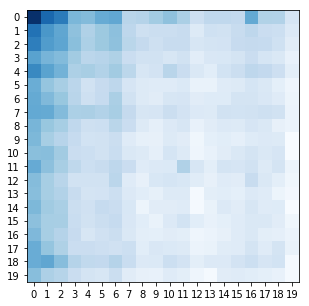

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(cm**0.3, cmap='Blues')
plt.xticks(ids);
plt.yticks(ids);

- boxes in the left of the plot contain higher values than on the right
- logistic regression can not cope well with unbalanced dataset, biased towards classes which appear more frequently in the training set
- emojis of almost all classes are misclassified as the most frequent one (❤) 
- however, most frequent emoji less frequently misclassified than other emojis

Other peculiarities:
- Emoji 😁(16) often confused with most frequent emoji ❤ (0)
- in general, bad performance can be seen as diagonal does not contain high values


# Failure Analysis on specific examples
# Att. bi-LSTM vs. Logistic regression

In [47]:
# Check where the logistic regression succeeds to predict the correct  
# emoji where the bidirectional LSTM with attention fails
success_logreg = [] 
inverse_vocab = {idx: word for word, idx in train_set.vocabulary.items()}
for i, (tweet_idx, y_pred_biLSTMatt) in enumerate(failure_indices_attbilstm):
    y_pred_log_reg = log_reg.predict(test_set_BOW.data[tweet_idx].reshape(1,-1))
    if y_pred_log_reg != test_set_BOW.labels[tweet_idx]:
        # Log reg. also failing at those examples...
        pass
    else:
        # Log reg. succeeds where bi-LSTM with attention fails
        # Get Tweet
        text_ids = test_set_BOW[tweet_idx][0]
        text_ids = text_ids.numpy()
        tweet = " ".join([inverse_vocab[idx] for idx in text_ids])
        
        
        print('Log reg. succeeds where bi-LSTM with attention fails:')
        print('Target Emoji: {}'.format(id_to_emoji[int(test_set_BOW.labels[tweet_idx])]))
        print('Logreg Emoji: {}'.format(id_to_emoji[int(y_pred_log_reg)]))
        print('BiLSTM Emoji: {}'.format(id_to_emoji[int(y_pred_biLSTMatt)]))
        print('\t' + 'TWEET:')
        print('\t' + tweet)
        print('-'*100)

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	with it texas day paradise ️ <hashtag> dallas join </hashtag> <hashtag> <UNK> </hashtag> <hashtag> bass </hashtag> <hashtag> chosen </hashtag> <hashtag> chapter </hashtag> <hashtag> fireplace </hashtag> <hashtag> lovely </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😂
	TWEET:
	i georgia get gate to with <hashtag> us class </hashtag> <hashtag> park zen </hashtag> @ olive award sunshine …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😍
	TWEET:
	thanks happy on daze las sign o i co <repeated> rider @ beautiful ' fla , name
-----------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	with it xs the a year st <repeated> example ' heather </allcaps> two you nails check to working the a <hashtag> this </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😁
	TWEET:
	wall slaying for some diego ' my will fall ️ want last that boardwalk in stand tbt <number> polaroid gets carolina guy is …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💯
	TWEET:
	my some doe lincoln <hashtag> doe distillery bad eve </hashtag> <hashtag> her distillery va </hashtag> @ doe distillery
-------------------------------------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💕
	TWEET:
	not <hashtag> where ladies we </hashtag> ️ a <hashtag> <UNK> more w beat </hashtag> @ hey livin …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	. brooklyn <hashtag> howard jackson </hashtag> <hashtag> yoga upper </hashtag> <hashtag> costa <UNK> </hashtag> <hashtag> homecoming </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😎
	TWEET:
	daughter <repeated> dude served in <number> guy happy one ️ a @ make , loves
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attent

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ❤
	TWEET:
	how clubs <hashtag> girls <repeated> ramen c </hashtag> <hashtag> minions nags </hashtag> <hashtag> sweet kill ' pics </hashtag> <hashtag> this you nice ' my good </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💙
	TWEET:
	magic hot high <number> ️ fine at which about and when magic <percent> our music ritz so " magic you " d the mid …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: 💯
	TWEET:
	is me <allcaps> u <repeated> <UNK> the a <hashtag> main </hashtag> <hashtag> hat </hashtag> <hashtag> good </hashtag> <hashtag> sexy </hashtag> <hashtag> support </hashtag> …

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 💙
	TWEET:
	auburn since after . first @ of denver good s ask at spoiled
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😊
	TWEET:
	el time <hashtag> blessed some </hashtag> <hashtag> stud </hashtag> <hashtag> celebration spending </hashtag> <hashtag> crew </hashtag> <hashtag> other </hashtag> <hashtag> repostapp butt </hashtag> <hashtag> gun big </hashtag> <hashtag> next biscayne </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😁
	TWEET:
	set the <hashtag> tshirt </hashtag> <hashtag> boy </hashtag> <hashtag> light noodles </hashtag> <hashtag> angles </hashtag> <hashtag> dont 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 💯
	TWEET:
	instagram texas would stevie , . augustine things after , h when of <UNK> s ever york <repeated> f off goals
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	york <UNK> to that diego ' together <repeated> got <hashtag> | </hashtag> <hashtag> food <UNK> </hashtag> ️ empire <UNK> <UNK> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😎
	TWEET:
	my good st only angeles the <hashtag> california first </hashtag> <hashtag> let <repeated> </hashtag> <hashtag> amazing uni </hashtag> @ amazing …
--------------------------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💕
	TWEET:
	world in my still wedding - from , - from
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 🇺🇸
	TWEET:
	insta eyes @ insta eyes where city
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: ❤
	TWEET:
	rock love <allcaps> ️ <hashtag> confused </hashtag> <hashtag> confused tonight </hashtag> <hashtag> confused my good </hashtag> <hashtag> confused lol </hashtag> <hashtag> confused <UNK> </hashtag> <hashtag> <UNK> <allcaps> </hashtag> <hashtag> confused white </hashtag> <hashtag> confused centre </hashtag> …
-----------------------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 🔥
	TWEET:
	just ' my he donuts kentucky one <repeated> - army do at her guy is <user> <hashtag> with dog </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😂
	TWEET:
	i taste friend <number> ) my good ️ a @ <UNK> love <allcaps> night pic myself
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 📷
	TWEET:
	together <repeated> great virginia to my we ️ special <UNK> custom @ ha tour bucks
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emo

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 😍
	TWEET:
	but tuesday symphony in <UNK> for . <UNK> of <UNK> s u missing who fun happy 1 <hashtag> horse </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💙
	TWEET:
	in this for ohio c ohio regal ohio ] ohio handsome ohio we : we the . light …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😜
	TWEET:
	clearly <UNK> want clearly <UNK> the outdoors pluto after go the <hashtag> dying dare </hashtag> @ <UNK> post
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 🇺🇸
	TWEET:
	needs <UNK> @ karma john sacramento
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😂
	TWEET:
	@ exchange cutie color
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ☀
	TWEET:
	not big ️ ! any beach tree it go , these because to team nothing w mother the a <hashtag> series </hashtag> <hashtag> • </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ☀
	TWEET:
	beach love <allcaps> disneyland i this united ️ ! <hashtag> 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😊
	TWEET:
	pictures bought one my swear you angeles happy such @ summer west
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	</allcaps> . this ' salad <hashtag> fell orlando </hashtag> <hashtag> my good </hashtag> <hashtag> i now because to team sister </hashtag> <hashtag> arena ' photography </hashtag> <hashtag> arena </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💜
	TWEET:
	<hashtag> way </hashtag> <UNK> always always always all i today artistry my still the a all <UNK> <hashtag> <UNK> michigan <UNK> madame </hashtag> …
-----------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕
	TWEET:
	@ exhibit south miami
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕
	TWEET:
	i today 6 with kingdom fire of i this how beach s love of <allcaps> disneyland s the @ singer , date west
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 📷
	TWEET:
	<hashtag> <UNK> </hashtag> <hashtag> rn </hashtag> superior life <hashtag> <UNK> </hashtag> colors <hashtag> k16 and </hashtag> life <hashtag> devils </hashtag> @ superior daisy
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Targ

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 😊
	TWEET:
	gg thanks to end isle @ <UNK> gallery
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😁
Logreg Emoji: 😁
BiLSTM Emoji: 💙
	TWEET:
	<hashtag> moss </hashtag> for lake <hashtag> coca pr </hashtag> nations , you no <hashtag> womens </hashtag> <hashtag> i <UNK> <UNK> </hashtag> <hashtag> can people </hashtag> <hashtag> backyard good </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	<hashtag> la oak y </hashtag> <hashtag> my bio </hashtag> <hashtag> my host </hashtag> <hashtag> amazing waking </hashtag> <hashtag> stop drunk </hashtag> <hashtag> <UNK> she </hashtag> @ fashion , same
-----------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 📸
Logreg Emoji: 📸
BiLSTM Emoji: 😉
	TWEET:
	<hashtag> : . <UNK> </hashtag> comedy clinton ' <UNK> french people <hashtag> couture good </hashtag> <hashtag> bucket ones </hashtag> @ front , …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 😂
	TWEET:
	brookfield sheridan buds it house . maryland the friend ) living with just <hashtag> sheridan </hashtag> <hashtag> maryland </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	some lovely here i this is ️ a <hashtag> lovely halloween </hashtag> high <number> <hashtag> see </hashtag> wedding summer pi
-------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ✨
Logreg Emoji: ✨
BiLSTM Emoji: 🇺🇸
	TWEET:
	down , well , magic love <allcaps> in . idaho , w love <allcaps> in . office you weekend , bright love <allcaps> in be y @ ~
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	<number> ? red best us dinner ️ <hashtag> much done </hashtag> <hashtag> dinner follow </hashtag> high repost <hashtag> us </hashtag> <hashtag> red </hashtag> @ . …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ☀
Logreg Emoji: ☀
BiLSTM Emoji: ❤
	TWEET:
	with it . but ️ a ! <hashtag> bros </hashtag> <hashtag> weekend ready </hashtag> <hashtag> fav weekend </hashtag> @ <UNK> sunshine , >
---------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: 😂
	TWEET:
	. act brooklyn . the stadium ' <number> the who fun torch the a t love <allcaps> thanks <UNK> the <hashtag> town <UNK> </hashtag> @ <UNK> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😂
	TWEET:
	with it what lake brother for <repeated> tots eve james work when the she , on for . <number> johnson hello @ hanging …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💙
	TWEET:
	most thanks <repeated> proof why you prize ️ day . party ' thoughts <UNK> the heart the it the world the <UNK> …
--------------------------------------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😂
	TWEET:
	. <UNK> point ) <UNK> with us ️ <hashtag> <UNK> </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💙
	TWEET:
	i this was soon the a @ <UNK> , mcm
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	my weekend tonight ️ @ some funday stunning 2016
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😘
	TWEET:
	. <UNK> able while my still winchester <repeated> of 7 s ️ idol weather is there and jersey our <hashtag> l

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😁
	TWEET:
	standard damn </allcaps> or verizon college make hoes more saturday nyc <number> at <number> <UNK> dancing christmas <hashtag> running </hashtag> <hashtag> running </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 🇺🇸
	TWEET:
	<hashtag> not dress we </hashtag> first your was birthday to went the for : was ️ america ( <repeated> ( now @ <UNK> <UNK>
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	good it world could new park ️ fine at which about and perform our do love <allcaps> 16 beauty it because to …
-----------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 🇺🇸
	TWEET:
	i did last & g i thanks to fun tri soap l today …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 💙
	TWEET:
	this little two to . cam you back @ <UNK> john ( weekends
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😉
	TWEET:
	cold times voice me university g happy <user> <UNK> @ lining …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😎
	TWEET:
	my tonight rounds . lunch cafe @ championships stadium 2016
---------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ✨
Logreg Emoji: ✨
BiLSTM Emoji: 😍
	TWEET:
	order . d liberty <UNK> <hashtag> <UNK> liberty </hashtag> <UNK> <UNK> play to lover no mad …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😂
	TWEET:
	<hashtag> is <allcaps> and </hashtag> <hashtag> building </hashtag> @ just foggy island
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😁
	TWEET:
	go definitely featured pokemon @ patio <UNK> , reaction , steak
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😊
	TWEET:
	my airl

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😎
	TWEET:
	of not big s ️ shit space you those be first ️ @ of fitness <repeated> s other standard early
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😊
	TWEET:
	<user> school </allcaps> <UNK> - bomb all of <UNK> s all </allcaps> missing chicago ️ <hashtag> boutique </hashtag>
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	have " not for texas little soccer planet one ️ have at at : i need it …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoj

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ☀
	TWEET:
	up <repeated> cafe we ! <hashtag> tide webster </hashtag> <hashtag> yacht </hashtag> <hashtag> <UNK> shadow </hashtag> <hashtag> ่ class </hashtag> <hashtag> ron florist </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😍
	TWEET:
	with turkey how discovery acting the the a <hashtag> trying francisco </hashtag> <hashtag> bio place </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😍
	TWEET:
	was huge muggin for what york fridays on . de his & kung . ’ …
----------------------------------------------------------------------------------------------------
Log 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 💯
	TWEET:
	do i ? because to can . just county i kentucky chicago the a 2016 people
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😁
Logreg Emoji: 😁
BiLSTM Emoji: 😊
	TWEET:
	some vikings <UNK> denim ' . before <hashtag> not excited </hashtag> @ stockton north , dinner
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: 😎
	TWEET:
	ny atlanta hustler your with first , fire disneyland & the @ <UNK> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 💙
	TWEET:
	house to fun my 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 🎄
	TWEET:
	inlove day monday in was night urbana <UNK> the a <hashtag> night </hashtag> <hashtag> <UNK> </hashtag> <hashtag> night pic </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😂
	TWEET:
	<UNK> dress we of dt s literally one the work new with yesterday birthday day up …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😁
	TWEET:
	person ️ i thanks . prom ️ a center and bringing @ <UNK> love <allcaps>
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Lo

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ❤
	TWEET:
	. sigma <elongated> birthday today 20 into my fancy <hashtag> " monday </hashtag> <hashtag> <elongated> whitewater in <repeated> vista </hashtag> <hashtag> mcm </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	fun with of very s our i this . auntie ️ a i goes <repeated> <elongated> time thanksgiving with us , these missed …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😂
	TWEET:
	i me golden today box with baby of <UNK> <UNK> s <hashtag> mtsu </hashtag> <hashtag> expensive states </hashtag> <hashtag> expensive council </hashtag> …
----------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	my family we baby <repeated> of <UNK> tonight s than <number> <number> / <number> lit thanksgiving go ️ a i ? …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💙
Logreg Emoji: 💙
BiLSTM Emoji: ✨
	TWEET:
	to - yogurt <hashtag> umbrella we </hashtag> @ hampton ( mail universal the <UNK> nephew love <allcaps> grille ' make
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 📷
	TWEET:
	clarion rooftop dallas or sleep tried college wow watch , <repeated> la empire to <user> on …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with att

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 🎄
	TWEET:
	@ pic pose ok loving clients beautiful
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 📸
Logreg Emoji: 📸
BiLSTM Emoji: 💙
	TWEET:
	<hashtag> focus </hashtag> <user> @ montgomery de
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕
	TWEET:
	much done on little neither sunset carolina ia pleasure <hashtag> dreaming pictures </hashtag> <hashtag> pleasure </hashtag> <hashtag> dreaming </hashtag> <hashtag> hippie </hashtag> <hashtag> valentine </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Targe

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😊
	TWEET:
	best us milton the school o </allcaps> rico one to happy <UNK> i world …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 🎄
	TWEET:
	art gang your capital ( i @ leggings anything , msu , by
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	then lets lot guy my continue = the a the a die
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💯
Logreg Emoji: 💯
BiLSTM Emoji: 😊
	TWEET:
	not bars california <UNK> boys dub boys beach very on …
-------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😁
Logreg Emoji: 😁
BiLSTM Emoji: 💕
	TWEET:
	" friends seen <hashtag> see for oregon </hashtag> <hashtag> commerce gave </hashtag> <hashtag> exclusive </hashtag> @ <UNK> as city
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	sneak with bro ️ a <hashtag> zootopia <UNK> <UNK> </hashtag> @ track new lolol || chi
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	drop for my <UNK> lol improv you motivated the outside everything trick tbt right ️ …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Targe

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😁
	TWEET:
	years burger shannon <UNK> <hashtag> babe </hashtag> <hashtag> years burger </hashtag> <hashtag> shannon </hashtag> <hashtag> tree babe </hashtag> <hashtag> much alpha </hashtag> <hashtag> wasn </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😊
	TWEET:
	texas <repeated> we for stamp stamp excuse the <hashtag> ranch </hashtag> <hashtag> successful </hashtag> high born <hashtag> deer manhattan </hashtag> @ <UNK> , summer west
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ☀
	TWEET:
	! of person disney s ️ a ! i ? rocky wind baddie in days , you in today <repeated> d

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 💙
	TWEET:
	lebanon parade @ <elongated> southwest
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ✨
	TWEET:
	ronald ( <UNK> have foot so girlfriend oak decorating remind <user> have y so sunset 3 <UNK> <user> national …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😂
	TWEET:
	yoga such <UNK> family out ️ thursday <UNK> across the stick lit on rock <hashtag> find </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😘
	TWEET:
	i 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 📷
	TWEET:
	of big s market star i tree in this o <user> our perfect around ️ <hashtag> <UNK> </hashtag> kingdom life happy <hashtag> force </hashtag> <hashtag> <UNK> </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😎
	TWEET:
	<user> so creds having <hashtag> and international " creds </hashtag> <hashtag> an street j </hashtag> <hashtag> well tonight stylist </hashtag> <hashtag> fallen bridal </hashtag> <user>
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: ❤
	TWEET:
	and treating top that " stop <hashtag> <UNK> </hashtag> <hashtag> missin tonight </hashtag> @ industry at jack

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 📸
	TWEET:
	<user> @ fav love <allcaps> total gluten
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 🇺🇸
	TWEET:
	trying handsome <hashtag> party terror </hashtag> <hashtag> party terror loving </hashtag> <hashtag> trying handsome </hashtag> <hashtag> days </hashtag> <hashtag> days park </hashtag> <hashtag> summer park </hashtag> <hashtag> an </hashtag> <hashtag> usa </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😜
	TWEET:
	<UNK> lol ️ a such take the a obsessed black ' two ️ get to <repeated> such take the a hotel in 0 ️ …
----------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😎
	TWEET:
	photo were </allcaps> los @ start
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💕
	TWEET:
	you : york man for . florida the a i women my topped ️ <hashtag> arena </hashtag> <hashtag> orlando count </hashtag> <hashtag> arena ' photography </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 😍
	TWEET:
	with it did my he <hashtag> strip </hashtag> done <hashtag> my during takes </hashtag> <hashtag> themed . <UNK> </hashtag> <hashtag> orange tonight </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. 

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💕
	TWEET:
	beautiful white toronto world <repeated> best time like westlake <UNK> for how are thank jane ️ am california sale ️ …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ❤
	TWEET:
	go it was puppies <hashtag> food but clearwater </hashtag> center and to : was look highway </allcaps> regram was …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: 😂
	TWEET:
	jazz these at bff <repeated> counting ' <UNK> smoke life <user> new <user> really <hashtag> music </hashtag>
----------------------------------------------------------------------------------------------------
Log reg. succeeds wh

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: ✨
	TWEET:
	never more loved hot out for <user> new <user> @ gal ( university miami
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ✨
Logreg Emoji: ✨
BiLSTM Emoji: 🇺🇸
	TWEET:
	hill to - from high <number> aesthetics wedding then , - from
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	not never indiana nyc california to my honestly got logan <UNK> ️ <user> @ boxing ' …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😊
	TWEET:
	taken on <repeated> nike drive <

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 😍
	TWEET:
	my florida @ <UNK> , month
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🇺🇸
Logreg Emoji: 🇺🇸
BiLSTM Emoji: ✨
	TWEET:
	of university universal adventure over sunday feel <repeated> shoot loved liberty i america sunday <allcaps> s <hashtag> state east </hashtag> the a <hashtag> george can you epcot over cars </hashtag> <hashtag> by working </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😁
Logreg Emoji: 😁
BiLSTM Emoji: 📷
	TWEET:
	go me <allcaps> <repeated> bay </allcaps> be big <hashtag> bay </hashtag> <hashtag> guys big </hashtag> <hashtag> curly weekend </hashtag> <hashtag> self eve </hashtag> <hashtag> got us </hashtag> …
--

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😊
	TWEET:
	sometimes beyond winter ️ <UNK> shower we ️ @ <UNK> utah
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 🔥
	TWEET:
	of boys on hanover s @ <UNK> smiles miami
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 📷
Logreg Emoji: 📷
BiLSTM Emoji: 😊
	TWEET:
	meredith walt sunday / <user> @ wisconsin , by
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💙
	TWEET:
	of around s ️ <user> and ) got ( ♡ <hashtag> taking </hashtag> <hashtag> french </hashtag> <hashtag> mike <

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 😍
	TWEET:
	of but s gardens passport weekend <UNK> for <hashtag> beach <allcaps> " <UNK> </hashtag> @ state east , by
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😉
	TWEET:
	time to add </allcaps> <repeated> son <hashtag> henny </hashtag> <hashtag> <UNK> </hashtag> <hashtag> time </hashtag> @ <UNK> , job
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 📷
Logreg Emoji: 📷
BiLSTM Emoji: 💕
	TWEET:
	brewing with got <UNK> your <UNK> on . wall caught hotel on 0 niagara <user> <user>
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with atte

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ☀
	TWEET:
	i miss in <repeated> florida ' duh ️ ! <hashtag> biggie duh </hashtag> <hashtag> <UNK> </hashtag> <hashtag> dominican </hashtag> <hashtag> means </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😍
	TWEET:
	triangle it twenty one for all everybody brunette all do ️ target here the a center and <UNK> @ . lush color
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 🔥
	TWEET:
	alert into . first when the a <hashtag> saying rescue vacation </hashtag> <hashtag> few again </hashtag> <hashtag> gay fest </hashtag> …
-------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💕
	TWEET:
	for my thursday i girl fried ️ <hashtag> find bathroom </hashtag> <hashtag> earlier ima </hashtag> <hashtag> find ima </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 🔥
	TWEET:
	<user> <UNK> to friends safe all day can & up to that . u subway and her to , …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🇺🇸
Logreg Emoji: 🇺🇸
BiLSTM Emoji: 😂
	TWEET:
	of my next malibu s <UNK> <UNK> aesthetics <UNK> <user> @ sometimes beyond winter , election
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Targ

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💙
	TWEET:
	little ) <repeated> district ' my he trip @ remix bed
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 🇺🇸
	TWEET:
	<hashtag> lying walkway </hashtag> @ lying love salad
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😜
	TWEET:
	. burlington show @ <UNK> , grill
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: 😂
	TWEET:
	feelthebern with shoes let game <hashtag> crack </hashtag> <hashtag> minion </hashtag> <hashtag> riverside <UN

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: ❤
	TWEET:
	somewhere to we <number> ' <hashtag> <UNK> </hashtag> the <hashtag> cuisine hampton chapter </hashtag> <hashtag> catch good </hashtag> <hashtag> pride catch </hashtag> <hashtag> chapter </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😂
	TWEET:
	texas and jersey want stuntin onesie r <hashtag> spontaneous </hashtag> <hashtag> stuntin onesie </hashtag> <hashtag> <UNK> ladies </hashtag> @ <UNK> ladies
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 🔥
	TWEET:
	. virginia ' - trip <UNK> <UNK> <hashtag> <UNK> <UNK> </hashtag> <hashtag> <UNK> arizona manhattan room </has

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 💙
	TWEET:
	w top up <UNK> happiness and @ must mets
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ✨
	TWEET:
	d.c. <UNK> half @ state east beautiful vacation
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😂
	TWEET:
	what ) of and s resort </allcaps> meet our no suppose our <hashtag> <UNK> song </hashtag> <hashtag> meet </hashtag> <hashtag> buster </hashtag> <hashtag> <UNK> </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ❤


Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕
	TWEET:
	not just ever path at <UNK> , weekend <UNK> @ fabulous at cute at meal wynwood
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 😊
	TWEET:
	just ' my <UNK> disney @ taylor 2 <number>
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🇺🇸
Logreg Emoji: 🇺🇸
BiLSTM Emoji: 😎
	TWEET:
	family ' . w ya our <hashtag> w </hashtag> <hashtag> banquet </hashtag> <hashtag> united </hashtag> <hashtag> park </hashtag> <hashtag> melting </hashtag> <hashtag> him place </hashtag> <hashtag> usa </hashtag> <hashtag> bananas </hashtag> …
---------------------------------------------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕
	TWEET:
	my toronto @ austin
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😎
Logreg Emoji: 😎
BiLSTM Emoji: 😂
	TWEET:
	like and stay . cosplay beach love <allcaps> today here man the <hashtag> <UNK> science </hashtag> <hashtag> <UNK> it th spending </hashtag> …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ✨
	TWEET:
	today work new is you add ️ fine at which about and perform our music ritz so day goes mommy in barely …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emo

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 🔥
Logreg Emoji: 🔥
BiLSTM Emoji: 😎
	TWEET:
	of almost s <user> of union apartments s @ burned oklahoma
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕
	TWEET:
	my night future i this merry @ moo , boy
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 🇺🇸
	TWEET:
	much rocks dead of • s @ vine country
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😉
	TWEET:
	photography lands denim party @ healthy post ( babe
--------------------------------------------------------------

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 😍
	TWEET:
	with church it today hearts @ lovers , ball
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😂
Logreg Emoji: 😂
BiLSTM Emoji: 💙
	TWEET:
	traffic @ brentwood of <UNK> s
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💯
Logreg Emoji: 💯
BiLSTM Emoji: 😎
	TWEET:
	i girl that man life be link classic <number> <hashtag> 1 em </hashtag> <hashtag> k </hashtag> <hashtag> observatory </hashtag> high <number> @ observatory guess , …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: ☀
	TWEET:
	heart love <

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 😊
	TWEET:
	trees the saddle in black boulder @ anderson early , street
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 😍
	TWEET:
	day things angel eli @ of eli s suit miami proud
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😁
	TWEET:
	is love <allcaps> most <hashtag> big </hashtag> ( baby friends baby i my prom i ? any i ? makeup creek sunday <hashtag> people </hashtag> </allcaps> with ever ️ …
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM

Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 😂
	TWEET:
	korean <UNK> motorsports <UNK> ️ <hashtag> <UNK> kevin </hashtag> @ mixtape reaching
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 🎄
	TWEET:
	running studios enjoyed miami <hashtag> <UNK> • </hashtag> @ enjoyed miami
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 🔥
	TWEET:
	<user> - wall it one she ️ hotel in 0 been of arlington christmas s your my chocolate ️ @ reyes proud
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: 💕


Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😍
Logreg Emoji: 😍
BiLSTM Emoji: ✨
	TWEET:
	project <elongated> <hashtag> <UNK> </hashtag> bomber does take @ couple store b
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: ❤
Logreg Emoji: ❤
BiLSTM Emoji: 💕
	TWEET:
	miss ohio we for this @ hip kids , state east
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 💕
Logreg Emoji: 💕
BiLSTM Emoji: 😂
	TWEET:
	<hashtag> thankful </hashtag> @ of b ' said babies s
----------------------------------------------------------------------------------------------------
Log reg. succeeds where bi-LSTM with attention fails:
Target Emoji: 😊
Logreg Emoji: 😊
BiLSTM Emoji: 😂
	TWEET:
	wearing my 1 smile mateo
------------------------------------------------